# Steps of preprocessing the data
1. Import necessary libraries
2. Read dataset
3. Sanity check
4. Exploratory Data Analysis
5. Missing value treatment
6. Outliers treatment
7. Duplicates and garbage value treatments
8. Normalization
9. Encoding of data

Questions to ask when cleaning the dataset:
- How to deal with missing values? -> Fill the defaut value, drop, use ML model to predict
- How to handle outliers? -> Leave it be or replace it with the boundaries values
- How to resolve skewed data?

# Step 1: Import necessary libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests

# Step 2: Read dataset

In [78]:
# Read dataset
data_link = 'UR3_Robot_dataset.xlsx'
df = pd.read_excel(data_link)


In [79]:
# Show the first 10 records
df.head(10)

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
0,1,2022-10-26T08:17:21.847Z,0.109628,27.8750,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,...,2.955651e-01,-0.000490,0.001310,-0.132836,-0.007479,-1.529622e-01,0.082732,1,0.0,False
1,2,2022-10-26T08:17:22.852Z,0.595605,27.8750,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,...,-7.391485e-30,-0.000304,0.002185,0.001668,-0.000767,4.169016e-04,0.505895,1,0.0,False
2,3,2022-10-26T08:17:23.857Z,-0.229474,27.8750,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,...,1.369386e-01,0.007795,-2.535874,0.379867,0.000455,-4.968559e-01,0.079420,1,0.0,False
3,4,2022-10-26T08:17:24.863Z,0.065053,27.8750,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,...,-9.030032e-02,-0.004911,-0.009096,-0.384196,0.018411,4.255591e-01,0.083325,1,0.0,False
4,5,2022-10-26T08:17:25.877Z,0.884140,27.8750,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,...,1.268088e-01,0.005567,0.001138,-0.353284,0.014994,1.809886e-01,0.086379,1,0.0,False
5,6,2022-10-26T08:17:26.885Z,0.118961,27.8125,-2.162542,29.3750,-1.211779,29.4375,-0.481834,32.1875,...,-4.639511e-05,0.000093,0.000262,0.002171,0.000265,-2.470161e-03,0.188310,1,0.0,False
6,7,2022-10-26T08:17:27.901Z,0.086138,27.8750,-1.757647,29.3750,-0.960634,29.4375,-0.488380,32.1875,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.121039e-44,0.085192,1,0.0,False
7,8,2022-10-26T08:17:28.903Z,0.075657,27.8750,-1.836465,29.3750,-0.961322,29.4375,-0.512541,32.1875,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.087058,1,0.0,False
8,9,2022-10-26T08:17:29.905Z,-0.186848,27.8750,-2.563738,29.3750,-1.418934,29.4375,-0.262015,32.1875,...,-1.660036e-01,0.002409,-0.015483,0.350063,-0.009986,-1.927102e-01,0.085785,1,0.0,False
9,10,2022-10-26T08:17:30.909Z,-0.158912,27.8750,-1.750777,29.3750,-1.979400,29.4375,-0.184550,32.1875,...,9.832304e-02,0.004996,-0.016996,0.496241,-0.017353,-5.886860e-01,0.085020,1,0.0,False


In [80]:
# Show the last 10 records
df.tail(10)

,Num,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,...,Speed_J0,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost
7399,7400,2022-10-26T15:35:57.524Z,-0.189909,37.1875,-2.495173,40.3125,-1.596931,40.6250,-1.573144,43.3750,...,0.128837,0.017049,-9.448170e-03,-1.612025e-01,-0.047146,0.055798,0.081966,264,0.0,False
7400,7401,2022-10-26T15:35:58.527Z,-0.051396,37.1875,-2.849013,40.3125,-0.830781,40.6875,-0.387453,43.3750,...,-0.050601,0.000000,2.204960e-16,1.376524e-02,0.001019,0.024078,0.081200,264,0.0,False
7401,7402,2022-10-26T15:35:59.529Z,-0.192624,37.1875,-2.526635,40.3125,-0.928360,40.6875,-0.356138,43.3750,...,-0.139898,0.000353,-3.307879e-03,1.283190e-01,0.005365,0.006288,0.079506,264,0.0,False
7402,7403,2022-10-26T15:36:00.539Z,-0.217085,37.1875,-2.628725,40.2500,-0.962782,40.6875,-0.399277,43.3125,...,0.000000,0.000000,0.000000e+00,4.031702e-36,0.000000,0.000000,0.086972,264,0.0,False
7403,7404,2022-10-26T15:36:01.549Z,-0.131406,37.1875,-2.367134,40.3125,-1.037989,40.6250,-0.470314,43.3125,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.089604,264,0.0,False
7404,7405,2022-10-26T15:36:02.555Z,-0.109017,37.1875,-2.261695,40.3125,-1.082678,40.6875,-0.494714,43.3750,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.080013,264,0.0,False
7405,7406,2022-10-26T15:36:03.562Z,-0.098536,37.1875,-2.251992,40.3125,-1.094420,40.6875,-0.515789,43.3750,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.078740,264,0.0,False
7406,7407,2022-10-26T15:36:04.571Z,-0.121100,37.1875,-2.280791,40.2500,-1.121319,40.6875,-0.502406,43.3750,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.091471,264,0.0,False
7407,7408,2022-10-26T15:36:05.572Z,-0.129370,37.1875,-2.269061,40.3125,-1.091610,40.6250,-0.491158,43.3750,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.090026,264,0.0,False
7408,7409,2022-10-26T15:36:06.580Z,-0.134429,37.1250,-2.244449,40.3125,-1.098950,40.6875,-0.502397,43.3750,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.089097,264,0.0,False


# Step 3: Sanity check of data

In [81]:
# Check dimensions
df.shape

(7409, 24)

In [82]:
# Get Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7409 entries, 0 to 7408
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Num                   7409 non-null   int64  
 1   Timestamp             7409 non-null   object 
 2   Current_J0            7363 non-null   float64
 3   Temperature_T0        7355 non-null   float64
 4   Current_J1            7355 non-null   float64
 5   Temperature_J1        7355 non-null   float64
 6   Current_J2            7355 non-null   float64
 7   Temperature_J2        7355 non-null   float64
 8   Current_J3            7355 non-null   float64
 9   Temperature_J3        7355 non-null   float64
 10  Current_J4            7355 non-null   float64
 11  Temperature_J4        7355 non-null   float64
 12  Current_J5            7355 non-null   float64
 13  Temperature_J5        7355 non-null   float64
 14  Speed_J0              7355 non-null   float64
 15  Speed_J1             

In [83]:
# Check for missing values
# If one column has too many missing values -> delete
df.isnull().sum()

Num                      0
Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop    54
grip_lost                0
dtype: int64

In [84]:
# Percent of missing values in each column
df.isnull().sum() / df.shape[0]*100

Num                     0.000000
Timestamp               0.000000
Current_J0              0.620867
Temperature_T0          0.728843
Current_J1              0.728843
Temperature_J1          0.728843
Current_J2              0.728843
Temperature_J2          0.728843
Current_J3              0.728843
Temperature_J3          0.728843
Current_J4              0.728843
Temperature_J4          0.728843
Current_J5              0.728843
Temperature_J5          0.728843
Speed_J0                0.728843
Speed_J1                0.728843
Speed_J2                0.728843
Speed_J3                0.728843
Speed_J4                0.728843
Speed_J5                0.728843
Tool_current            0.728843
cycle                   0.000000
Robot_ProtectiveStop    0.728843
grip_lost               0.000000
dtype: float64

In [85]:
# Finding duplicates
df.duplicated().sum()

0

In [86]:
# Identify garbage values
for i in df.select_dtypes(include="object").columns:
  print(df[i].value_counts())
  print("***"*10)

Timestamp
2022-10-26T08:17:21.847Z      1
"2022-10-26T14:54:48.592Z"    1
"2022-10-26T14:54:46.583Z"    1
"2022-10-26T14:54:45.576Z"    1
"2022-10-26T14:54:44.568Z"    1
                             ..
2022-10-26T08:59:32.230Z      1
2022-10-26T08:59:31.227Z      1
2022-10-26T08:59:30.219Z      1
2022-10-26T08:59:28.198Z      1
2022-10-26T15:36:06.580Z      1
Name: count, Length: 7409, dtype: int64
******************************


# Step 4: Resolving columns and data types

In [87]:
# Reformat the column name
for i in list(df.columns):
    df = df.rename(columns={i: i.strip()})

In [88]:
df.columns

Index(['Num', 'Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle', 'Robot_ProtectiveStop',
       'grip_lost'],
      dtype='object')

In [89]:
# Change the 'Robot_ProtectiveStop' column from float to bool type
df['Robot_ProtectiveStop'] = df['Robot_ProtectiveStop'].astype(bool)

In [90]:
# Drop the "num" column in the Dataframe
df = df.drop(columns=['Num', ])

In [91]:
# Use the .replace() method to map True/False to 1/0
df = df.replace({True: 1, False: 0})

In [92]:
df['System Health'] = np.where((df['Robot_ProtectiveStop'] == 1) | (df['grip_lost'] == 1), 1, 0)
df['System Health']

0       0
1       0
2       0
3       0
4       0
       ..
7404    0
7405    0
7406    0
7407    0
7408    0
Name: System Health, Length: 7409, dtype: int32

# Step 4: Exploratory Data Analysis (EDA)

In [93]:
df.head(5)

,Timestamp,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,...,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost,System Health
0,2022-10-26T08:17:21.847Z,0.109628,27.875,-2.024669,29.3750,-1.531442,29.3750,-0.998570,32.1250,-0.062540,...,-0.000490,0.001310,-0.132836,-0.007479,-0.152962,0.082732,1,0,0,0
1,2022-10-26T08:17:22.852Z,0.595605,27.875,-2.278456,29.3125,-0.866556,29.4375,-0.206097,32.1875,-1.062762,...,-0.000304,0.002185,0.001668,-0.000767,0.000417,0.505895,1,0,0,0
2,2022-10-26T08:17:23.857Z,-0.229474,27.875,-2.800408,29.3125,-2.304336,29.4375,-0.351499,32.1250,-0.668869,...,0.007795,-2.535874,0.379867,0.000455,-0.496856,0.079420,1,0,0,0
3,2022-10-26T08:17:24.863Z,0.065053,27.875,-3.687768,29.3125,-1.217652,29.4375,-1.209115,32.1250,-0.819755,...,-0.004911,-0.009096,-0.384196,0.018411,0.425559,0.083325,1,0,0,0
4,2022-10-26T08:17:25.877Z,0.884140,27.875,-2.938830,29.3750,-1.794076,29.4375,-2.356471,32.1875,-0.966427,...,0.005567,0.001138,-0.353284,0.014994,0.180989,0.086379,1,0,0,0


In [94]:
# Describe the data
# The 25th percentile is a value in a set of data where 25% of the data points are below that value and 75% are above it
# The 50th percentile is a value in a set of data where 50% of the data points are below that value and 50% are above it
# The 75th percentile is a value in a set of data where 75% of the data points are below that value and 25% are above it
df.describe()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost,System Health
count,7363.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,...,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7355.000000,7409.000000,7409.000000,7409.000000,7409.000000
mean,-0.048934,34.906781,-2.297936,37.659636,-1.199381,38.064064,-0.605312,40.936999,-0.022968,42.605167,...,0.000061,0.003791,-0.004610,-0.000810,0.002880,0.109527,141.113241,0.044810,0.032798,0.077203
std,0.829395,2.762057,0.800450,3.247315,0.609984,3.311948,0.514937,3.182399,0.630789,3.677670,...,0.049370,0.729422,0.359999,0.038436,0.313953,0.078832,80.542340,0.206901,0.178119,0.266932
min,-6.247756,27.812500,-5.808734,29.312500,-4.171966,29.375000,-3.333102,32.125000,-4.738406,32.250000,...,-0.330833,-2.733091,-1.271460,-0.226233,-1.629721,0.020180,1.000000,0.000000,0.000000,0.000000
25%,-0.195026,33.000000,-2.664919,35.375000,-1.552803,35.750000,-0.830933,38.937500,-0.125809,40.375000,...,-0.000659,-0.004100,-0.005365,-0.000120,-0.000803,0.082387,68.000000,0.000000,0.000000,0.000000
50%,-0.080830,36.500000,-2.236342,39.687500,-1.077137,40.187500,-0.571190,43.062500,-0.012325,45.062500,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.085192,154.000000,0.000000,0.000000,0.000000
75%,0.095959,37.062500,-1.778334,40.125000,-0.838721,40.437500,-0.388398,43.125000,0.086098,45.187500,...,0.000540,0.000205,0.009912,0.000066,0.012924,0.089518,218.000000,0.000000,0.000000,0.000000
max,6.806938,37.250000,1.083596,40.500000,2.464940,40.937500,2.270268,43.437500,4.089389,45.375000,...,0.615526,2.679848,1.363093,0.193914,1.378015,0.602054,264.000000,1.000000,1.000000,1.000000


In [95]:
df.describe(include="object")

,Timestamp
count,7409
unique,7409
top,2022-10-26T08:17:21.847Z
freq,1


C:\Users\khang\AppData\Local\Temp\ipykernel_15132\3694947855.py:3: UserWarning: Ignore
  warnings.warn("Ignore")


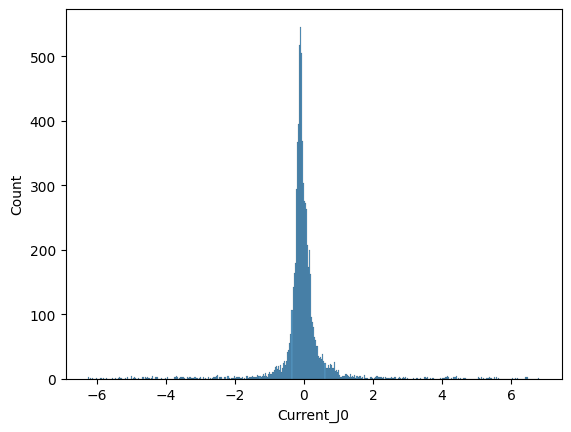

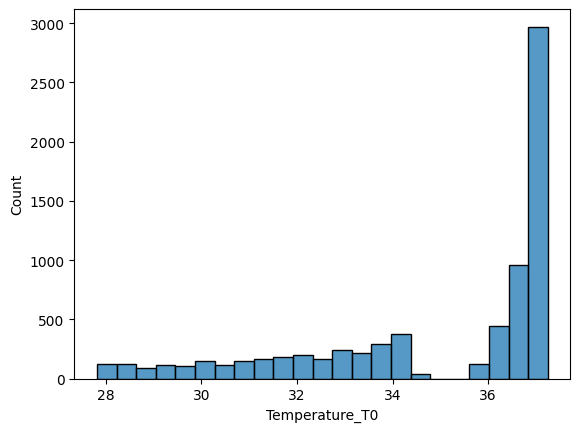

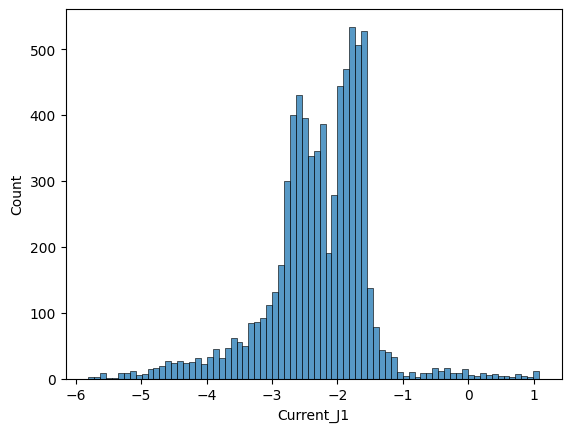

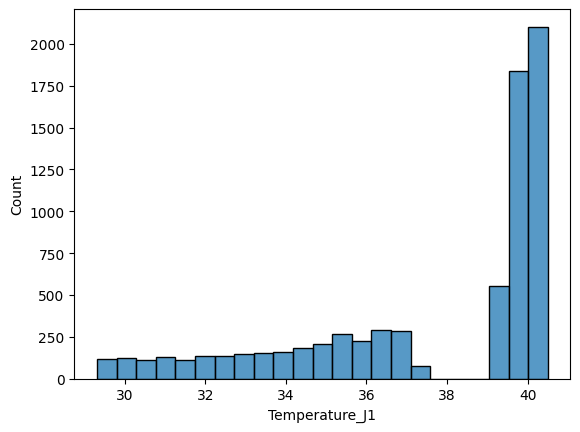

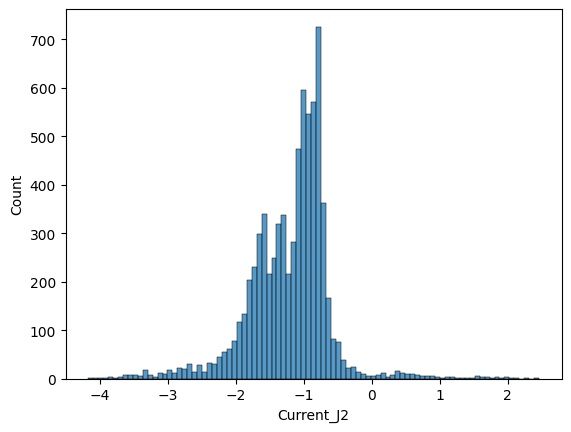

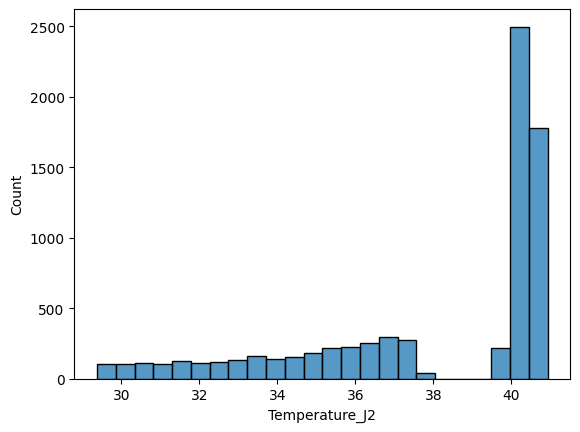

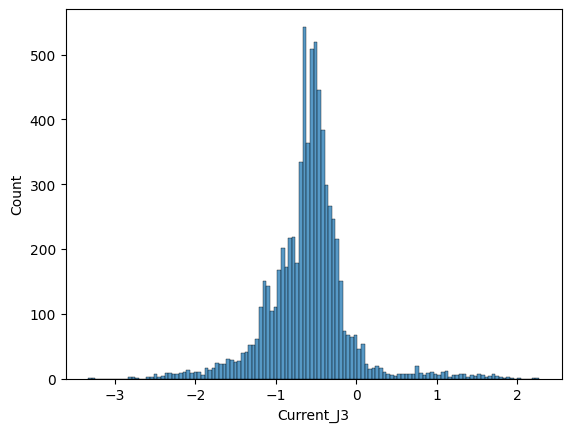

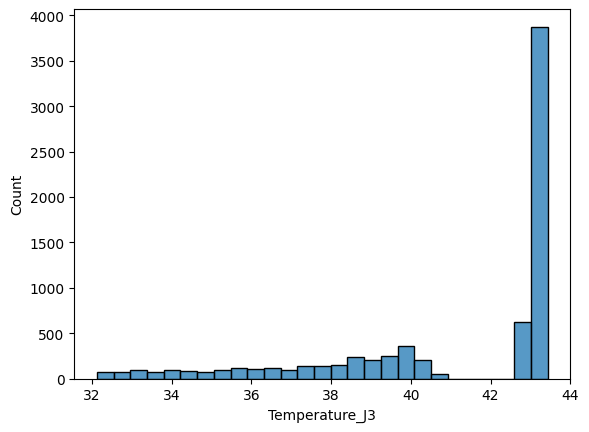

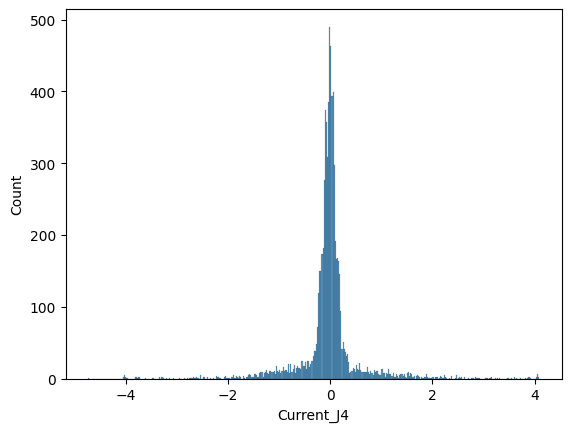

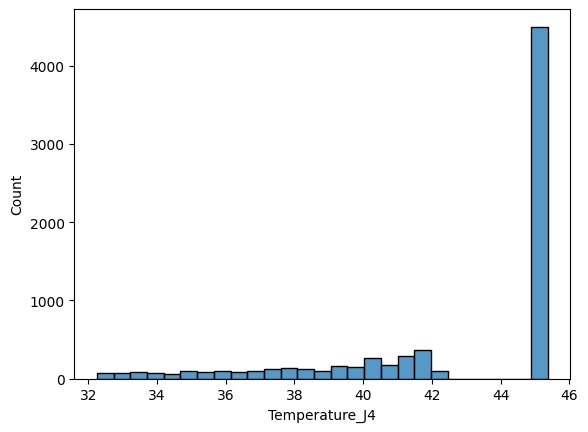

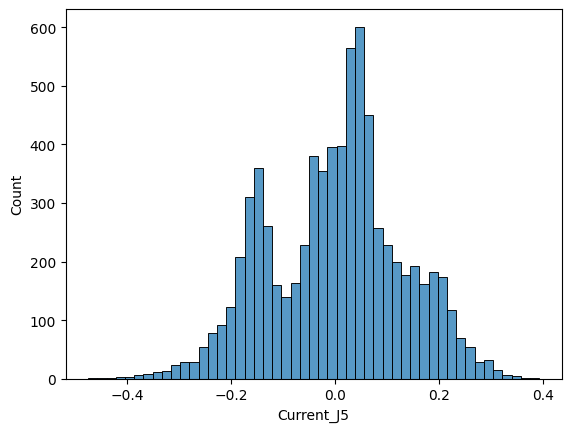

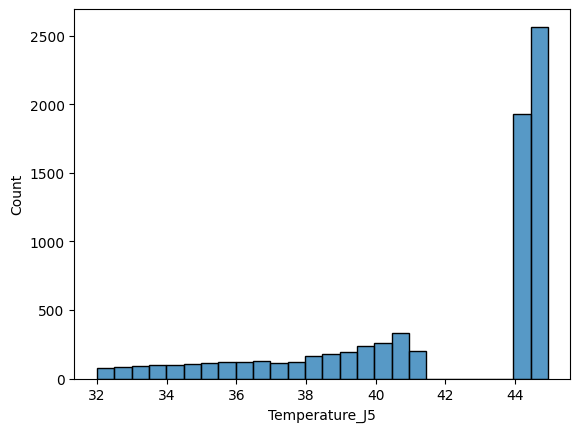

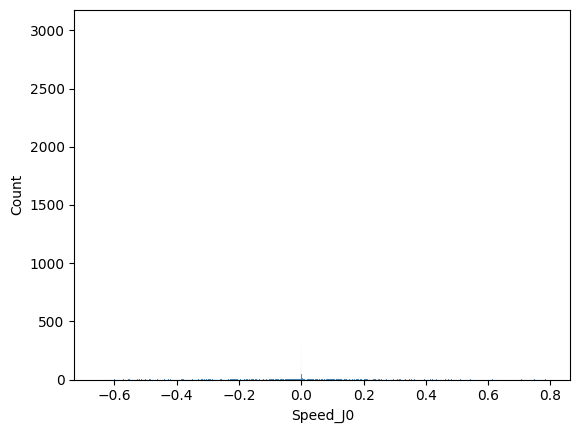

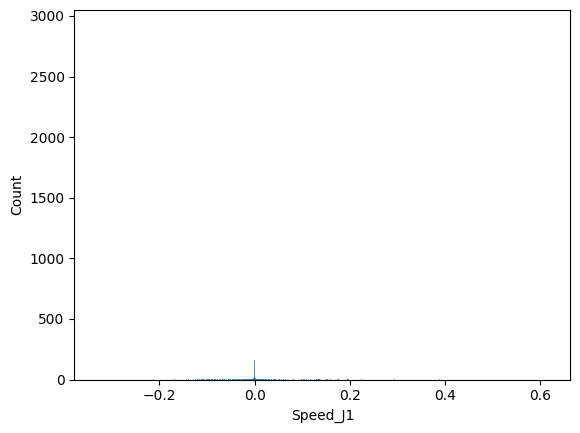

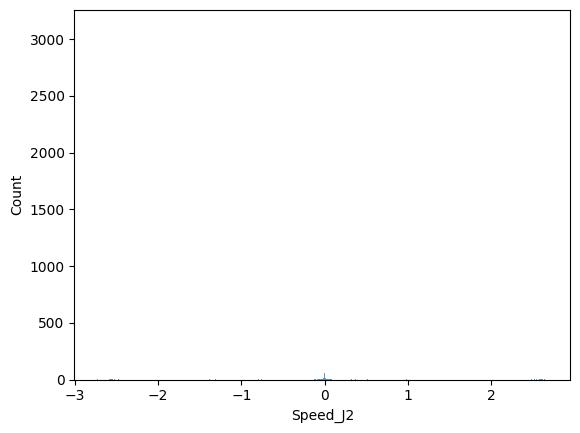

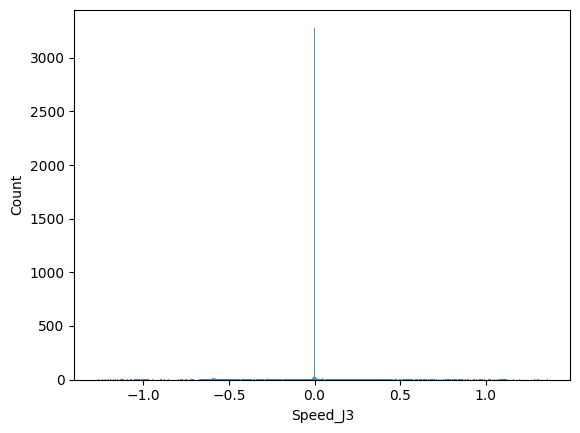

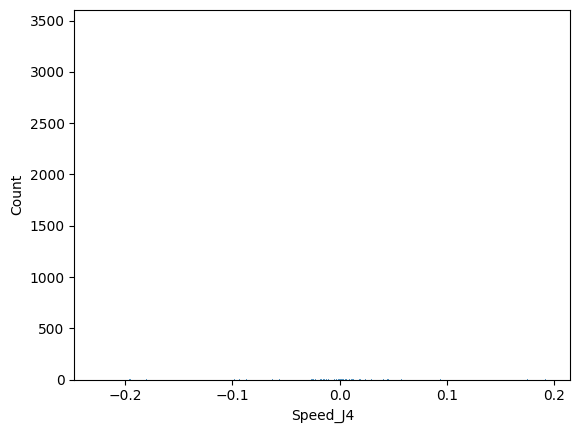

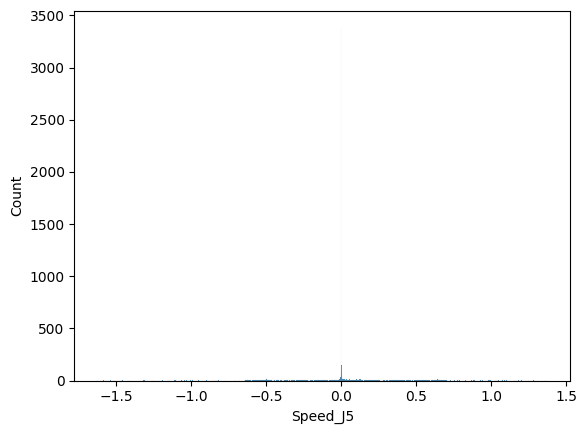

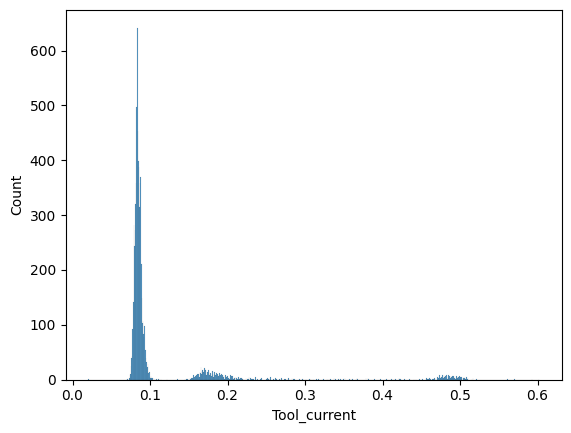

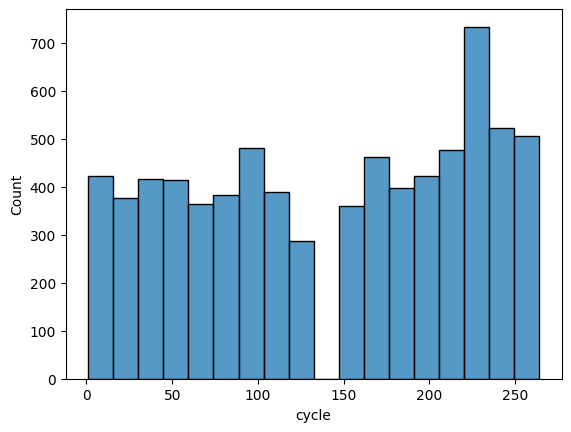

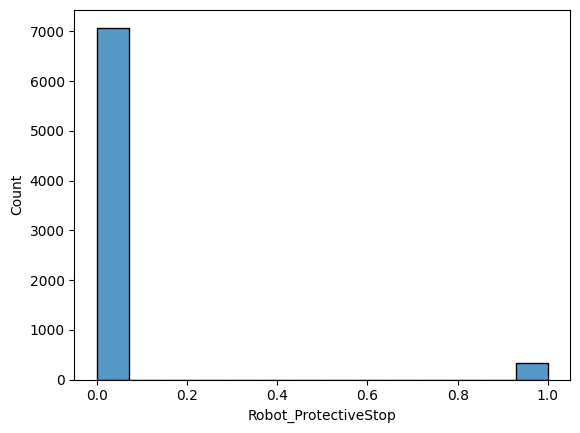

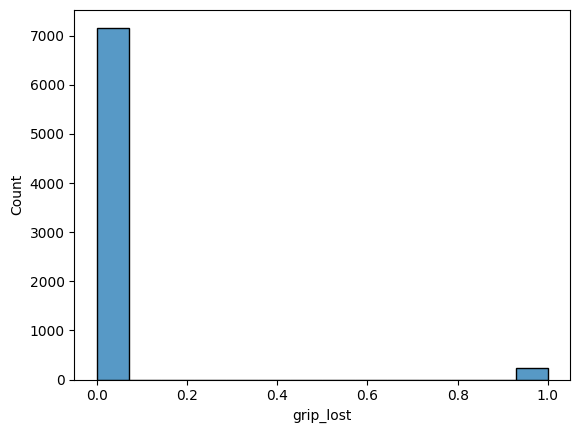

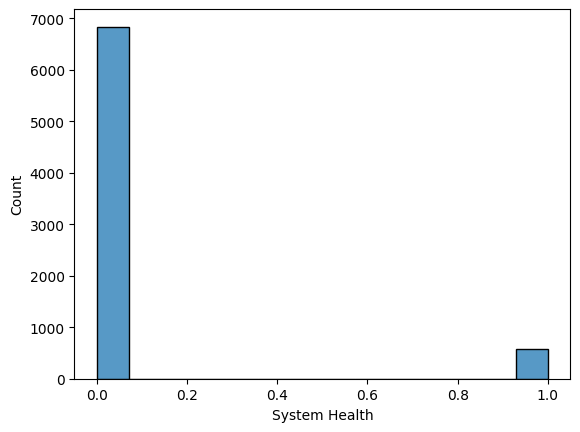

In [96]:
# Histogram to understand the distribution
import warnings
warnings.warn("Ignore")
for i in df.select_dtypes(include="number").columns:
  sns.histplot(data=df, x=i)
  plt.show()

C:\Users\khang\AppData\Local\Temp\ipykernel_15132\3102395789.py:3: UserWarning: Ignore
  warnings.warn("Ignore")


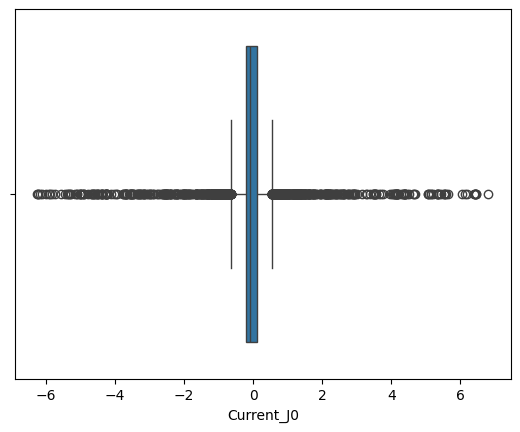

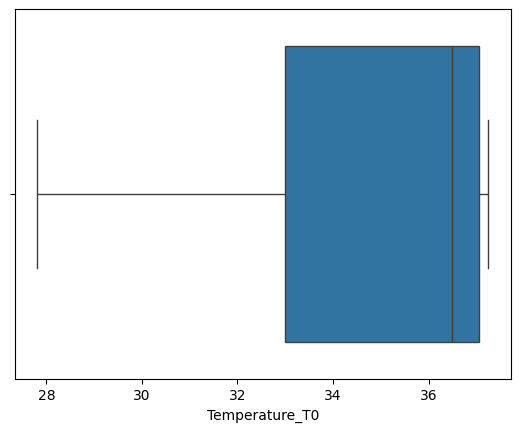

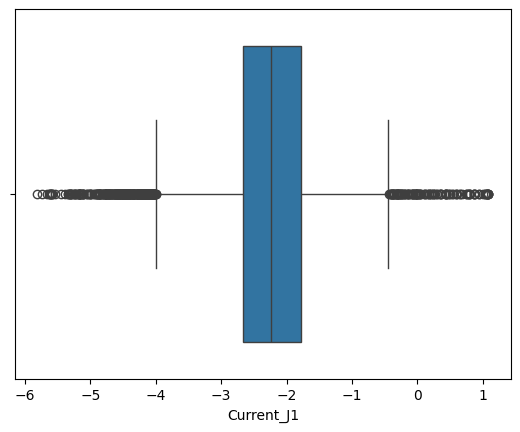

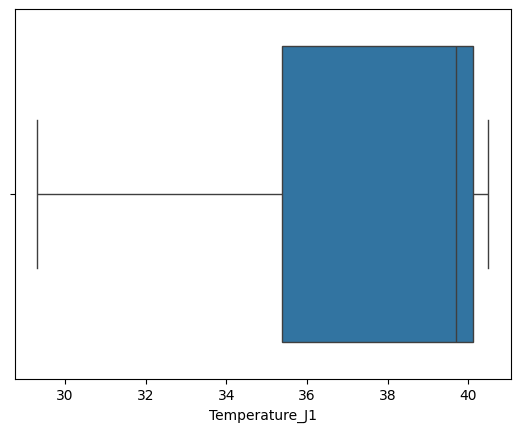

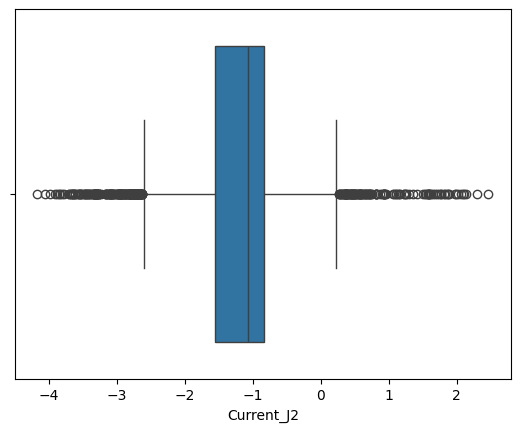

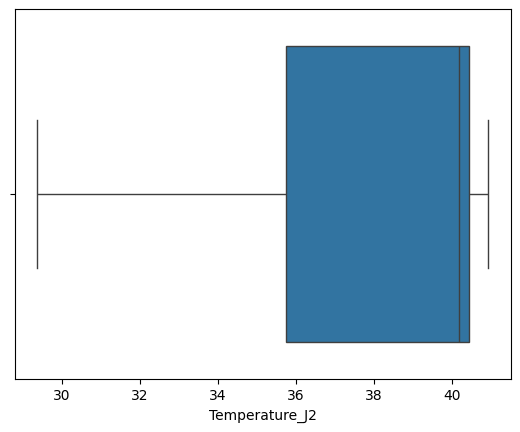

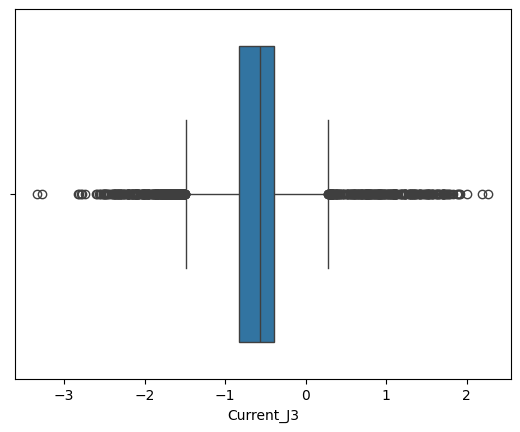

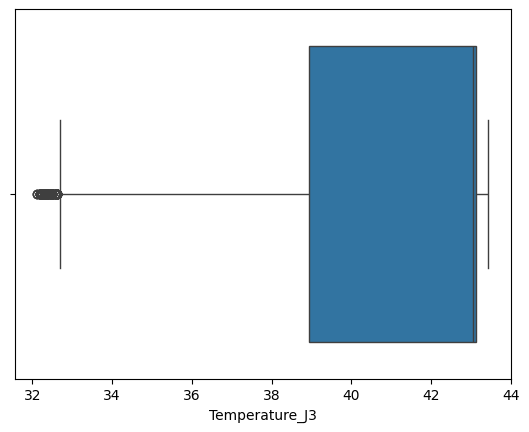

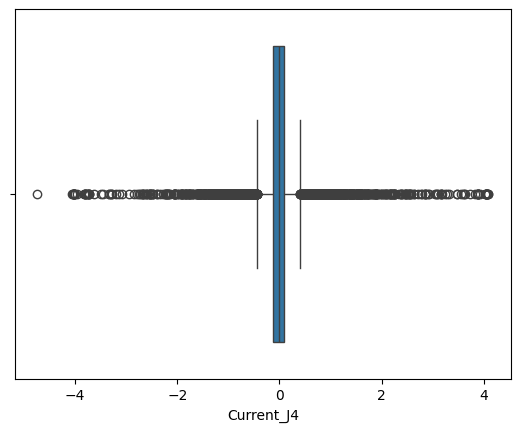

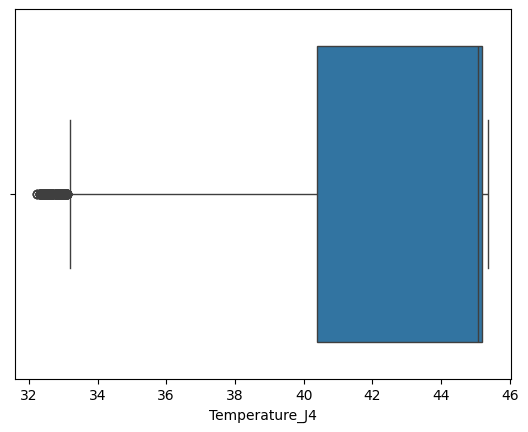

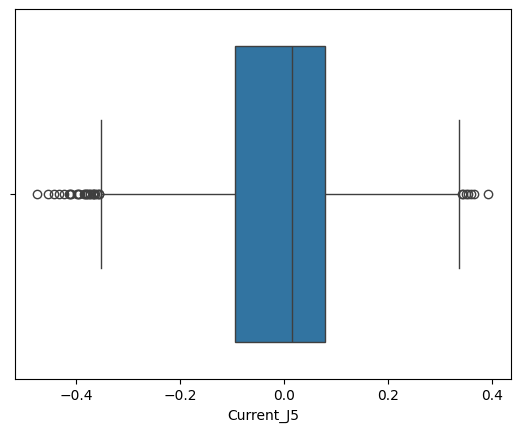

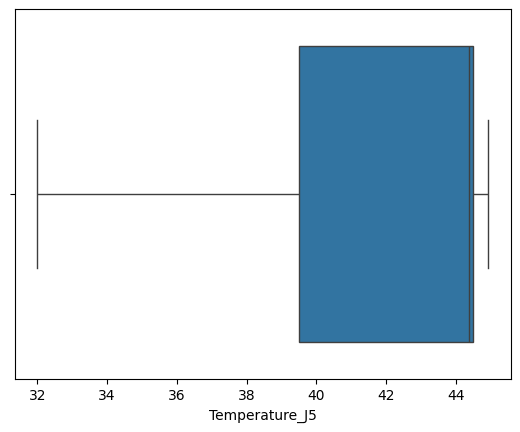

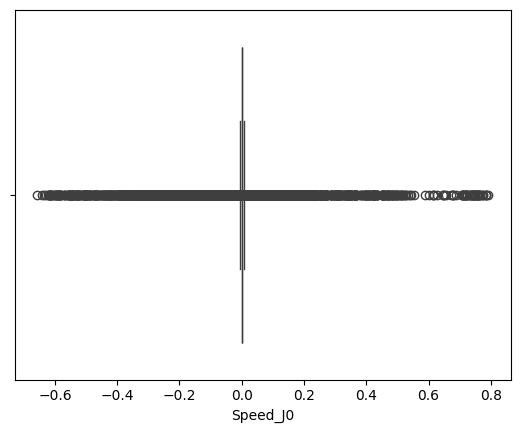

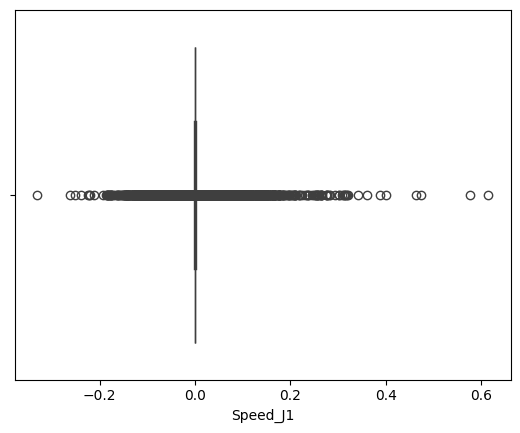

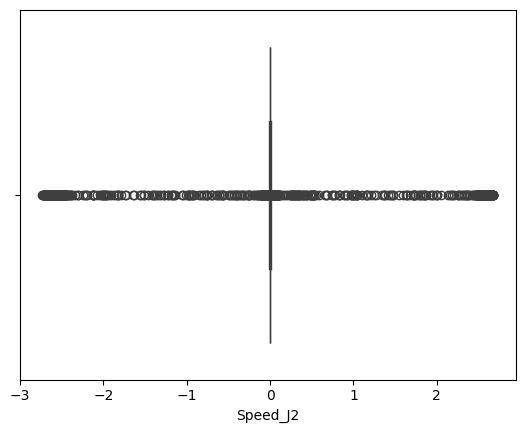

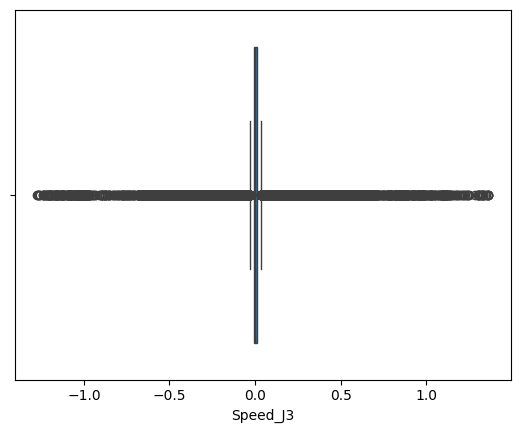

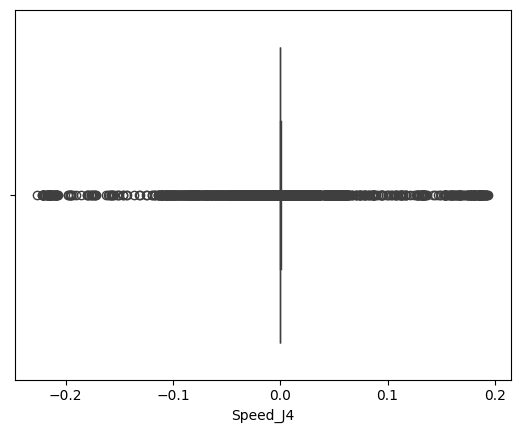

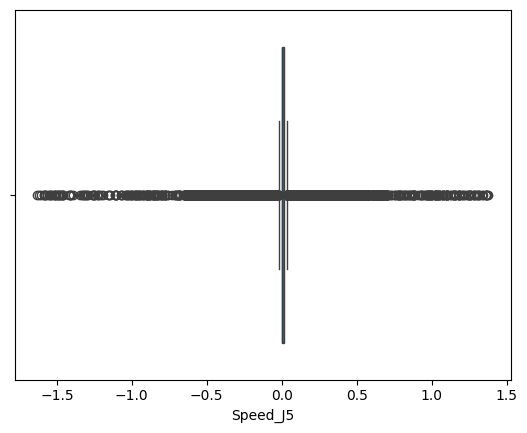

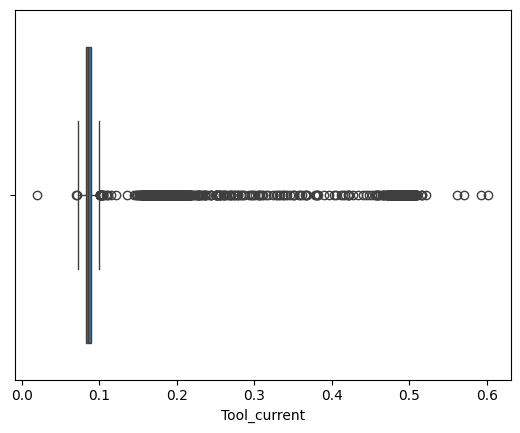

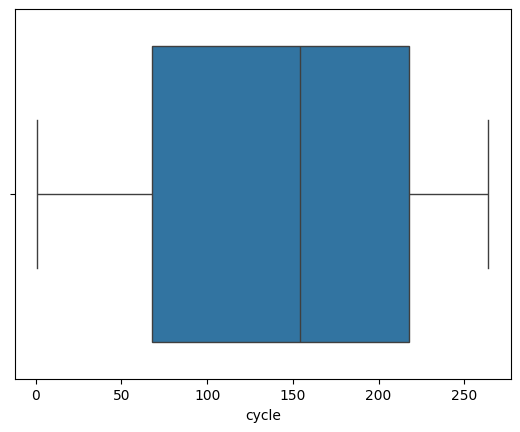

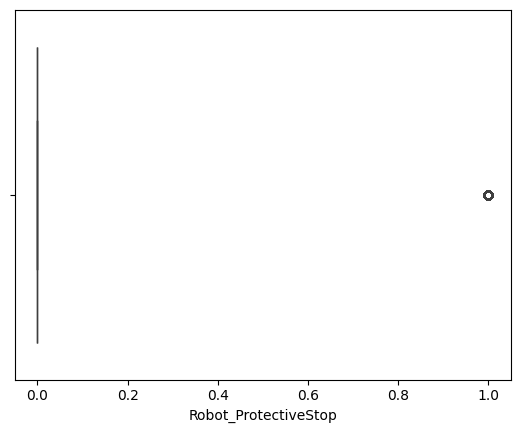

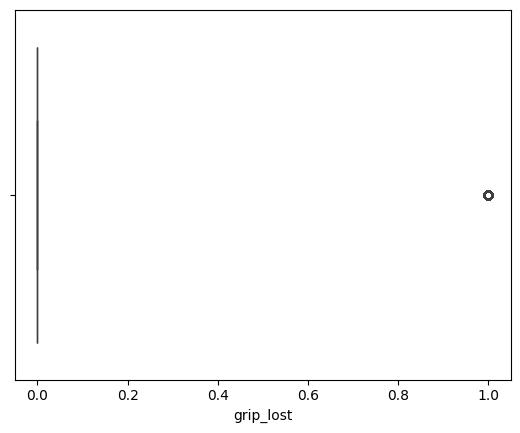

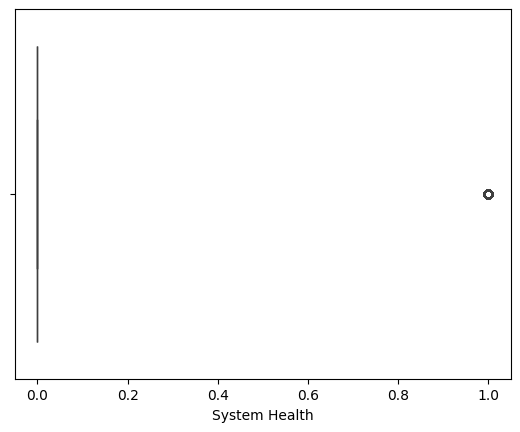

In [97]:
# Boxplot to identify the outliers
import warnings
warnings.warn("Ignore")
for i in df.select_dtypes(include="number").columns:
  sns.boxplot(data=df, x=i)
  plt.show()

In [98]:
df.select_dtypes(include="number").columns

Index(['Current_J0', 'Temperature_T0', 'Current_J1', 'Temperature_J1',
       'Current_J2', 'Temperature_J2', 'Current_J3', 'Temperature_J3',
       'Current_J4', 'Temperature_J4', 'Current_J5', 'Temperature_J5',
       'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3', 'Speed_J4', 'Speed_J5',
       'Tool_current', 'cycle', 'Robot_ProtectiveStop', 'grip_lost',
       'System Health'],
      dtype='object')

Current_J0


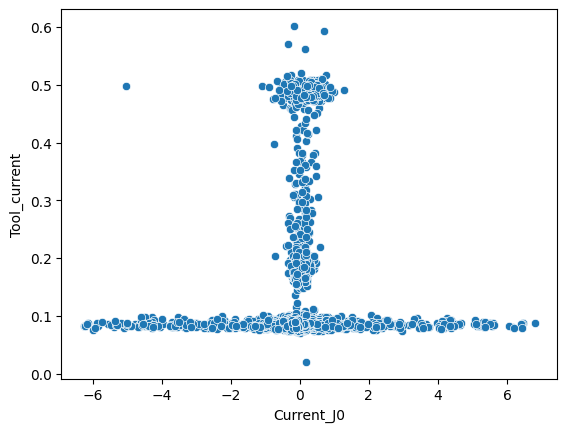

Temperature_T0


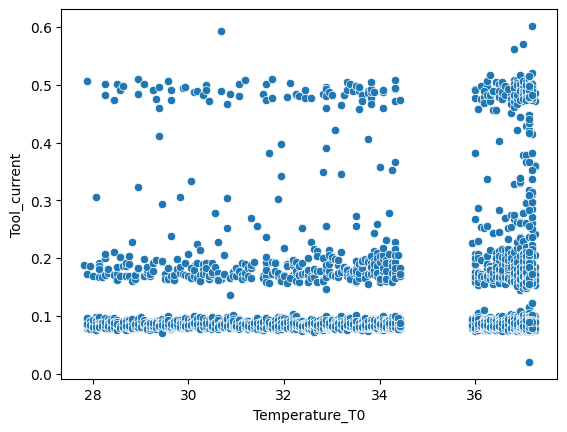

Current_J1


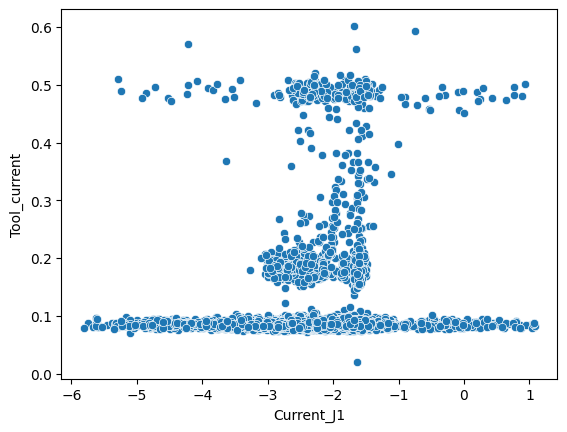

Temperature_J1


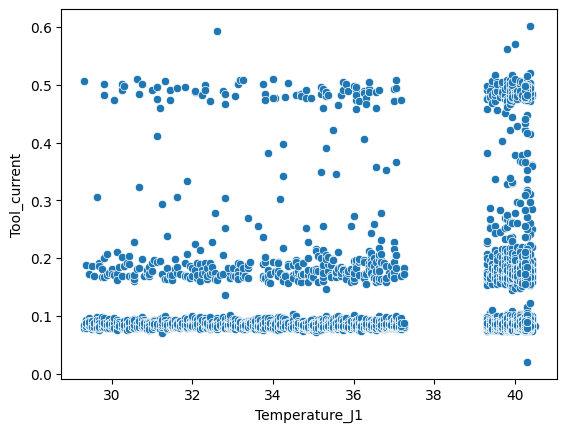

Current_J2


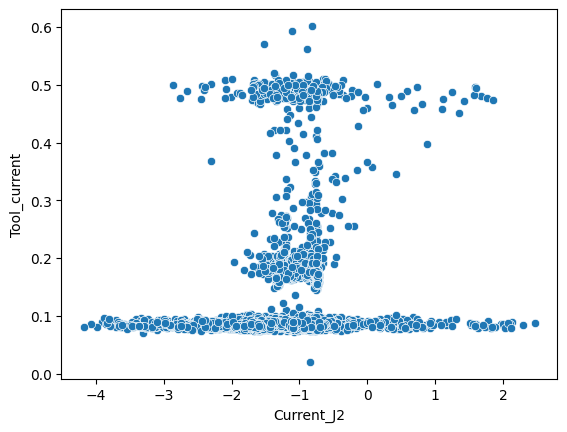

Temperature_J2


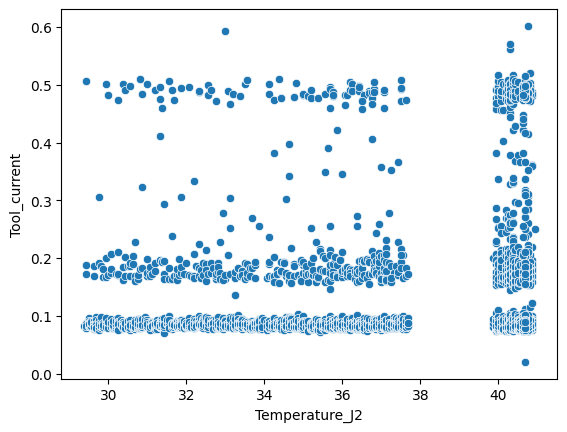

Current_J3


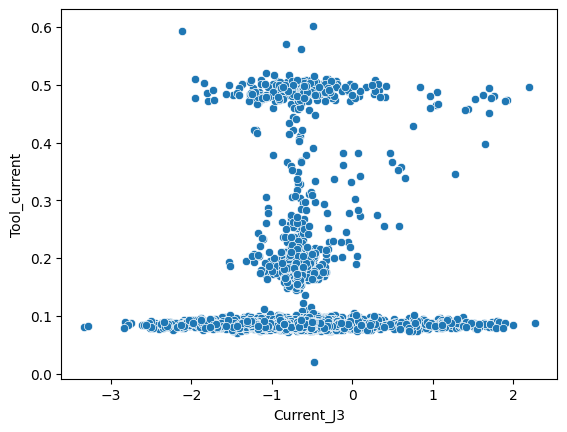

Temperature_J3


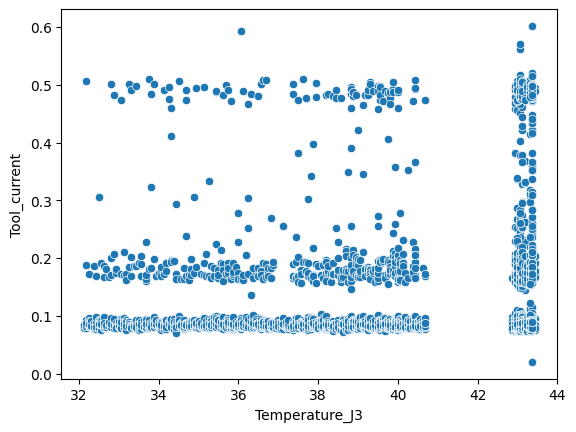

Current_J4


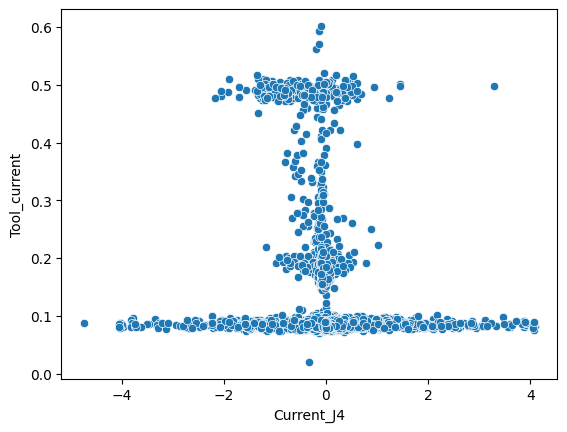

Temperature_J4


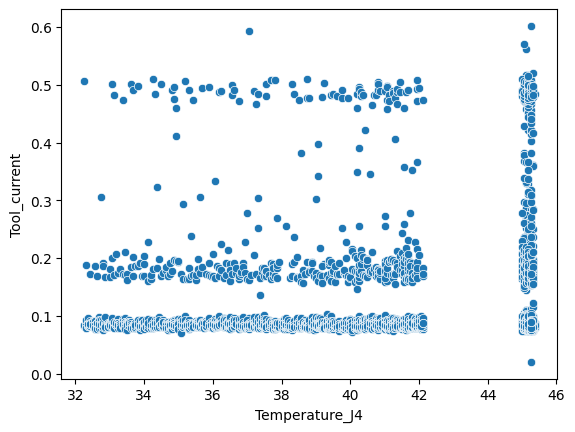

Current_J5


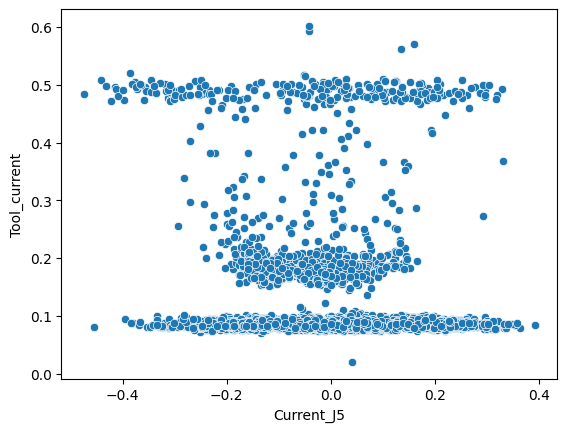

Temperature_J5


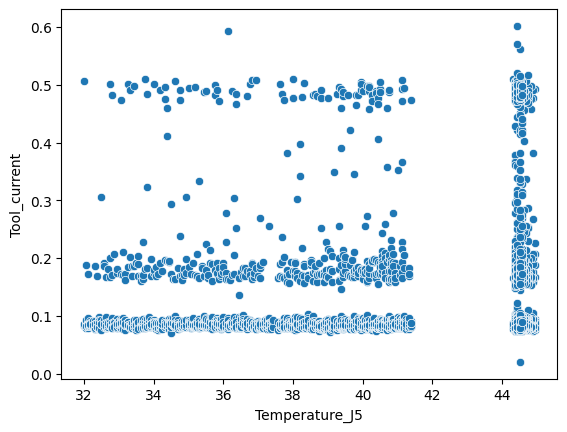

Speed_J0


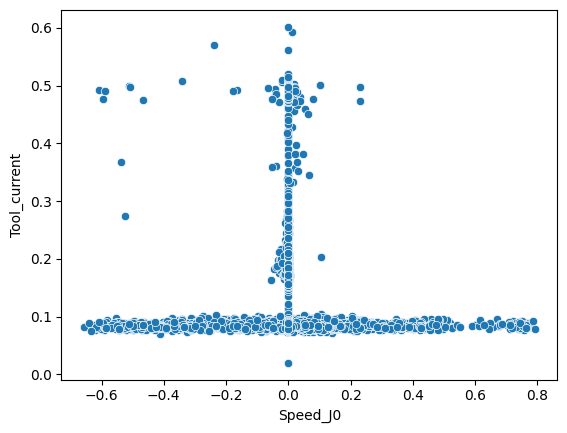

Speed_J1


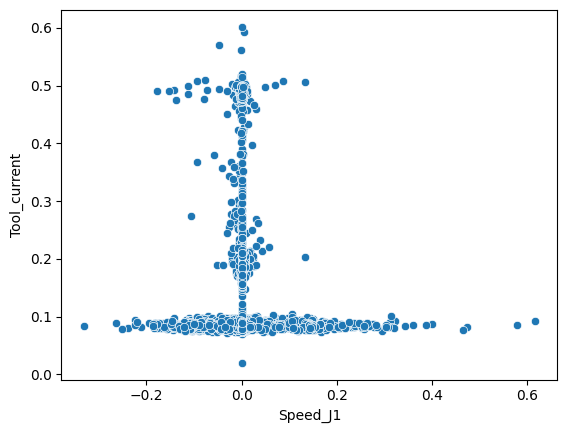

Speed_J2


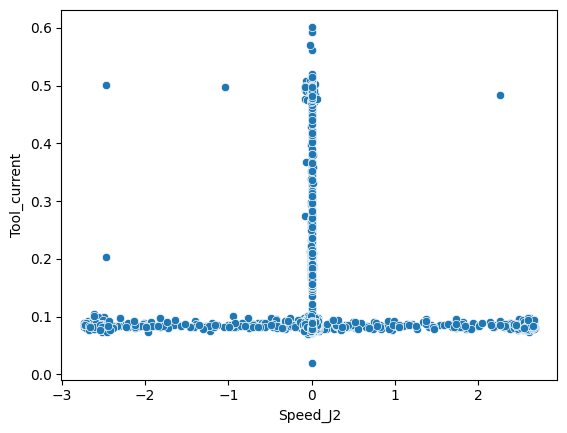

Speed_J3


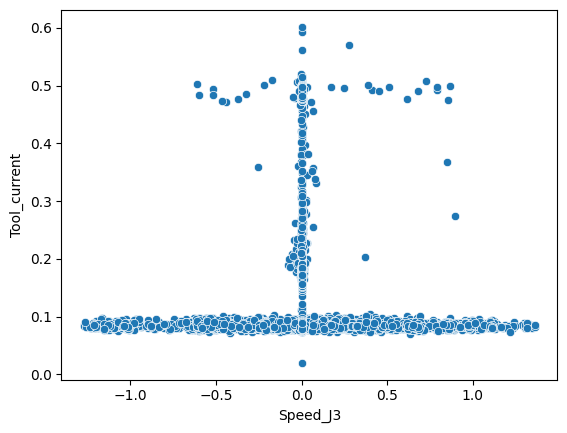

Speed_J4


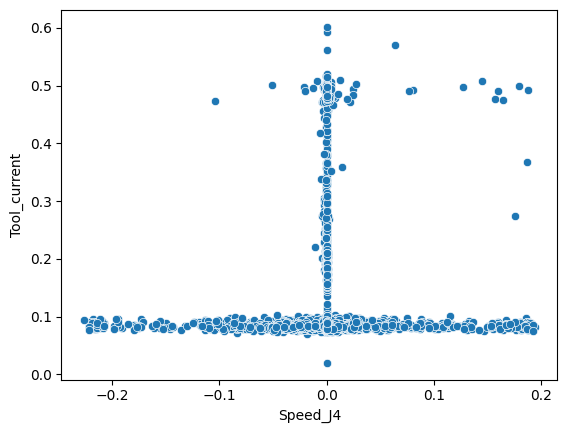

Speed_J5


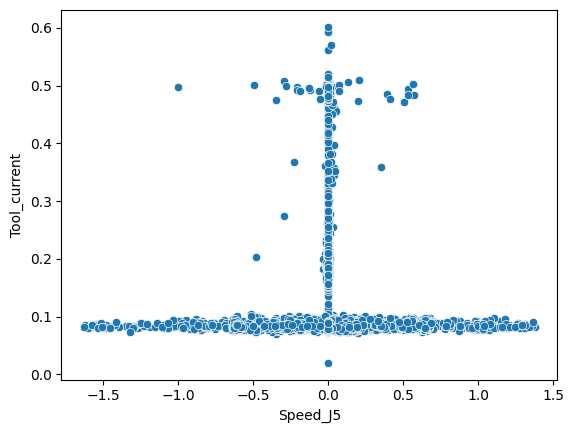

Tool_current


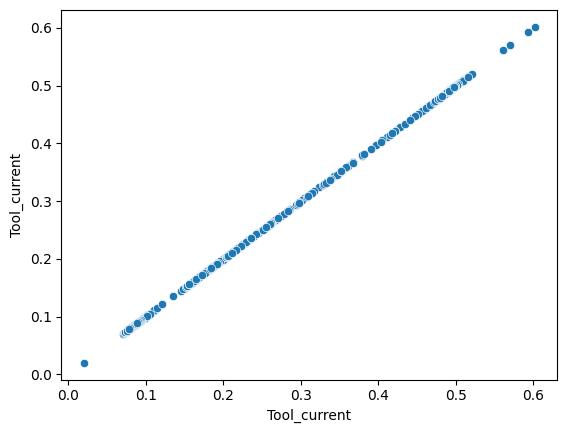

cycle


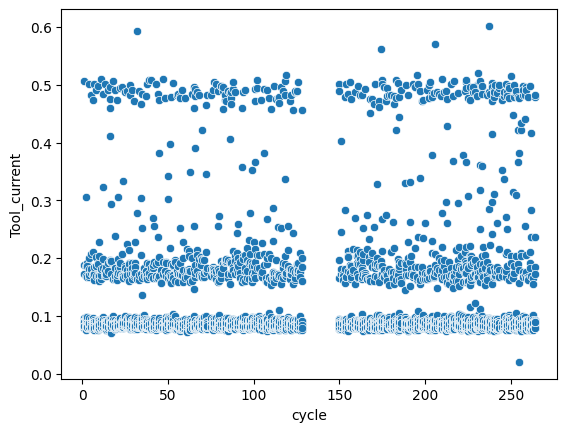

Robot_ProtectiveStop


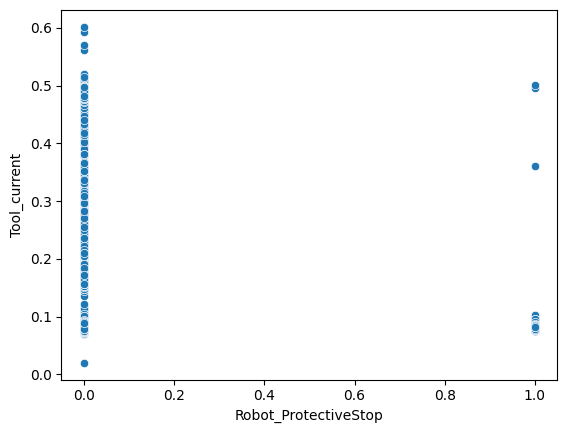

grip_lost


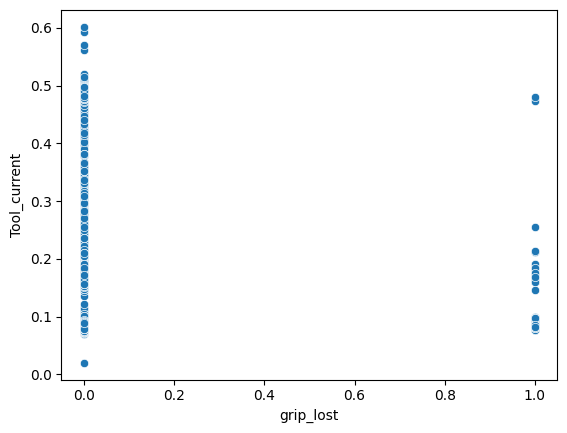

System Health


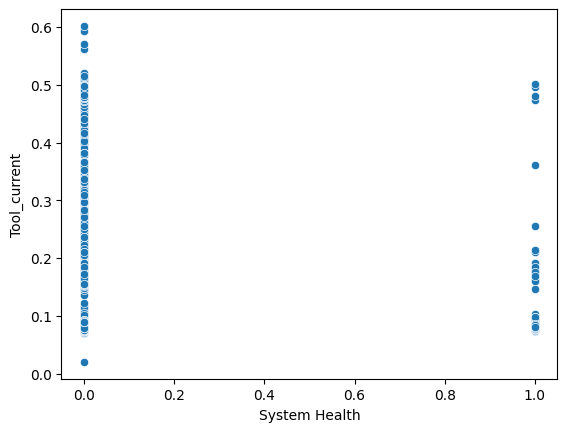

In [99]:
# Scatter plot to understand the relationship - Analyse after the outliers treatments
for i in list(df.select_dtypes(include="number").columns):
    print(i)
    sns.scatterplot(data=df, x=i, y='Tool_current')
    plt.show()

In [100]:
# Correlation heatmap to discove the relation
df.select_dtypes(include="number").corr()

,Current_J0,Temperature_T0,Current_J1,Temperature_J1,Current_J2,Temperature_J2,Current_J3,Temperature_J3,Current_J4,Temperature_J4,...,Speed_J1,Speed_J2,Speed_J3,Speed_J4,Speed_J5,Tool_current,cycle,Robot_ProtectiveStop,grip_lost,System Health
Current_J0,1.000000,-0.009314,0.022532,-0.009484,0.058976,-0.009825,-0.314995,-0.009981,-0.758236,-0.009885,...,-0.226628,0.356381,-0.244565,-0.008498,0.261849,0.053898,-0.007506,0.024693,0.012216,0.026678
Temperature_T0,-0.009314,1.000000,-0.023205,0.999462,-0.019163,0.998795,-0.006077,0.996209,0.010335,0.993953,...,0.000749,-0.000443,0.004419,0.002351,-0.004765,0.001704,0.918589,0.058720,-0.087198,-0.018391
Current_J1,0.022532,-0.023205,1.000000,-0.023018,0.665123,-0.022582,0.389860,-0.022531,-0.109582,-0.023206,...,0.091001,-0.083808,-0.179593,-0.196619,0.020599,0.104208,-0.019799,-0.108608,0.064817,-0.036154
Temperature_J1,-0.009484,0.999462,-0.023018,1.000000,-0.018798,0.999680,-0.005082,0.997606,0.010388,0.995650,...,0.000901,0.000140,0.005230,0.002420,-0.005396,0.001870,0.912878,0.058526,-0.088532,-0.019454
Current_J2,0.058976,-0.019163,0.665123,-0.018798,1.000000,-0.018252,0.424019,-0.018573,-0.079308,-0.019452,...,-0.088891,0.219213,-0.410194,-0.059585,0.439471,0.119936,-0.014799,-0.108862,0.070432,-0.031552
Temperature_J2,-0.009825,0.998795,-0.022582,0.999680,-0.018252,1.000000,-0.005140,0.998766,0.010502,0.997359,...,0.001117,-0.000202,0.004668,0.002322,-0.004970,0.002328,0.904232,0.057937,-0.090443,-0.021169
Current_J3,-0.314995,-0.006077,0.389860,-0.005082,0.424019,-0.005140,1.000000,-0.004903,0.151713,-0.005689,...,0.224123,-0.198596,0.380436,0.090220,-0.328304,0.009071,-0.003707,-0.066140,-0.022318,-0.065035
Temperature_J3,-0.009981,0.996209,-0.022531,0.997606,-0.018573,0.998766,-0.004903,1.000000,0.011062,0.999487,...,0.001602,0.000154,0.004459,0.002289,-0.004786,0.002182,0.886734,0.056056,-0.095095,-0.025745
Current_J4,-0.758236,0.010335,-0.109582,0.010388,-0.079308,0.010502,0.151713,0.011062,1.000000,0.010967,...,0.278766,-0.109017,0.092377,-0.056203,-0.101316,-0.114459,0.007584,0.017204,-0.018903,-0.000306
Temperature_J4,-0.009885,0.993953,-0.023206,0.995650,-0.019452,0.997359,-0.005689,0.999487,0.010967,1.000000,...,0.001544,0.000212,0.003689,0.001786,-0.004147,0.002029,0.874086,0.056079,-0.095771,-0.026187


<Axes: >

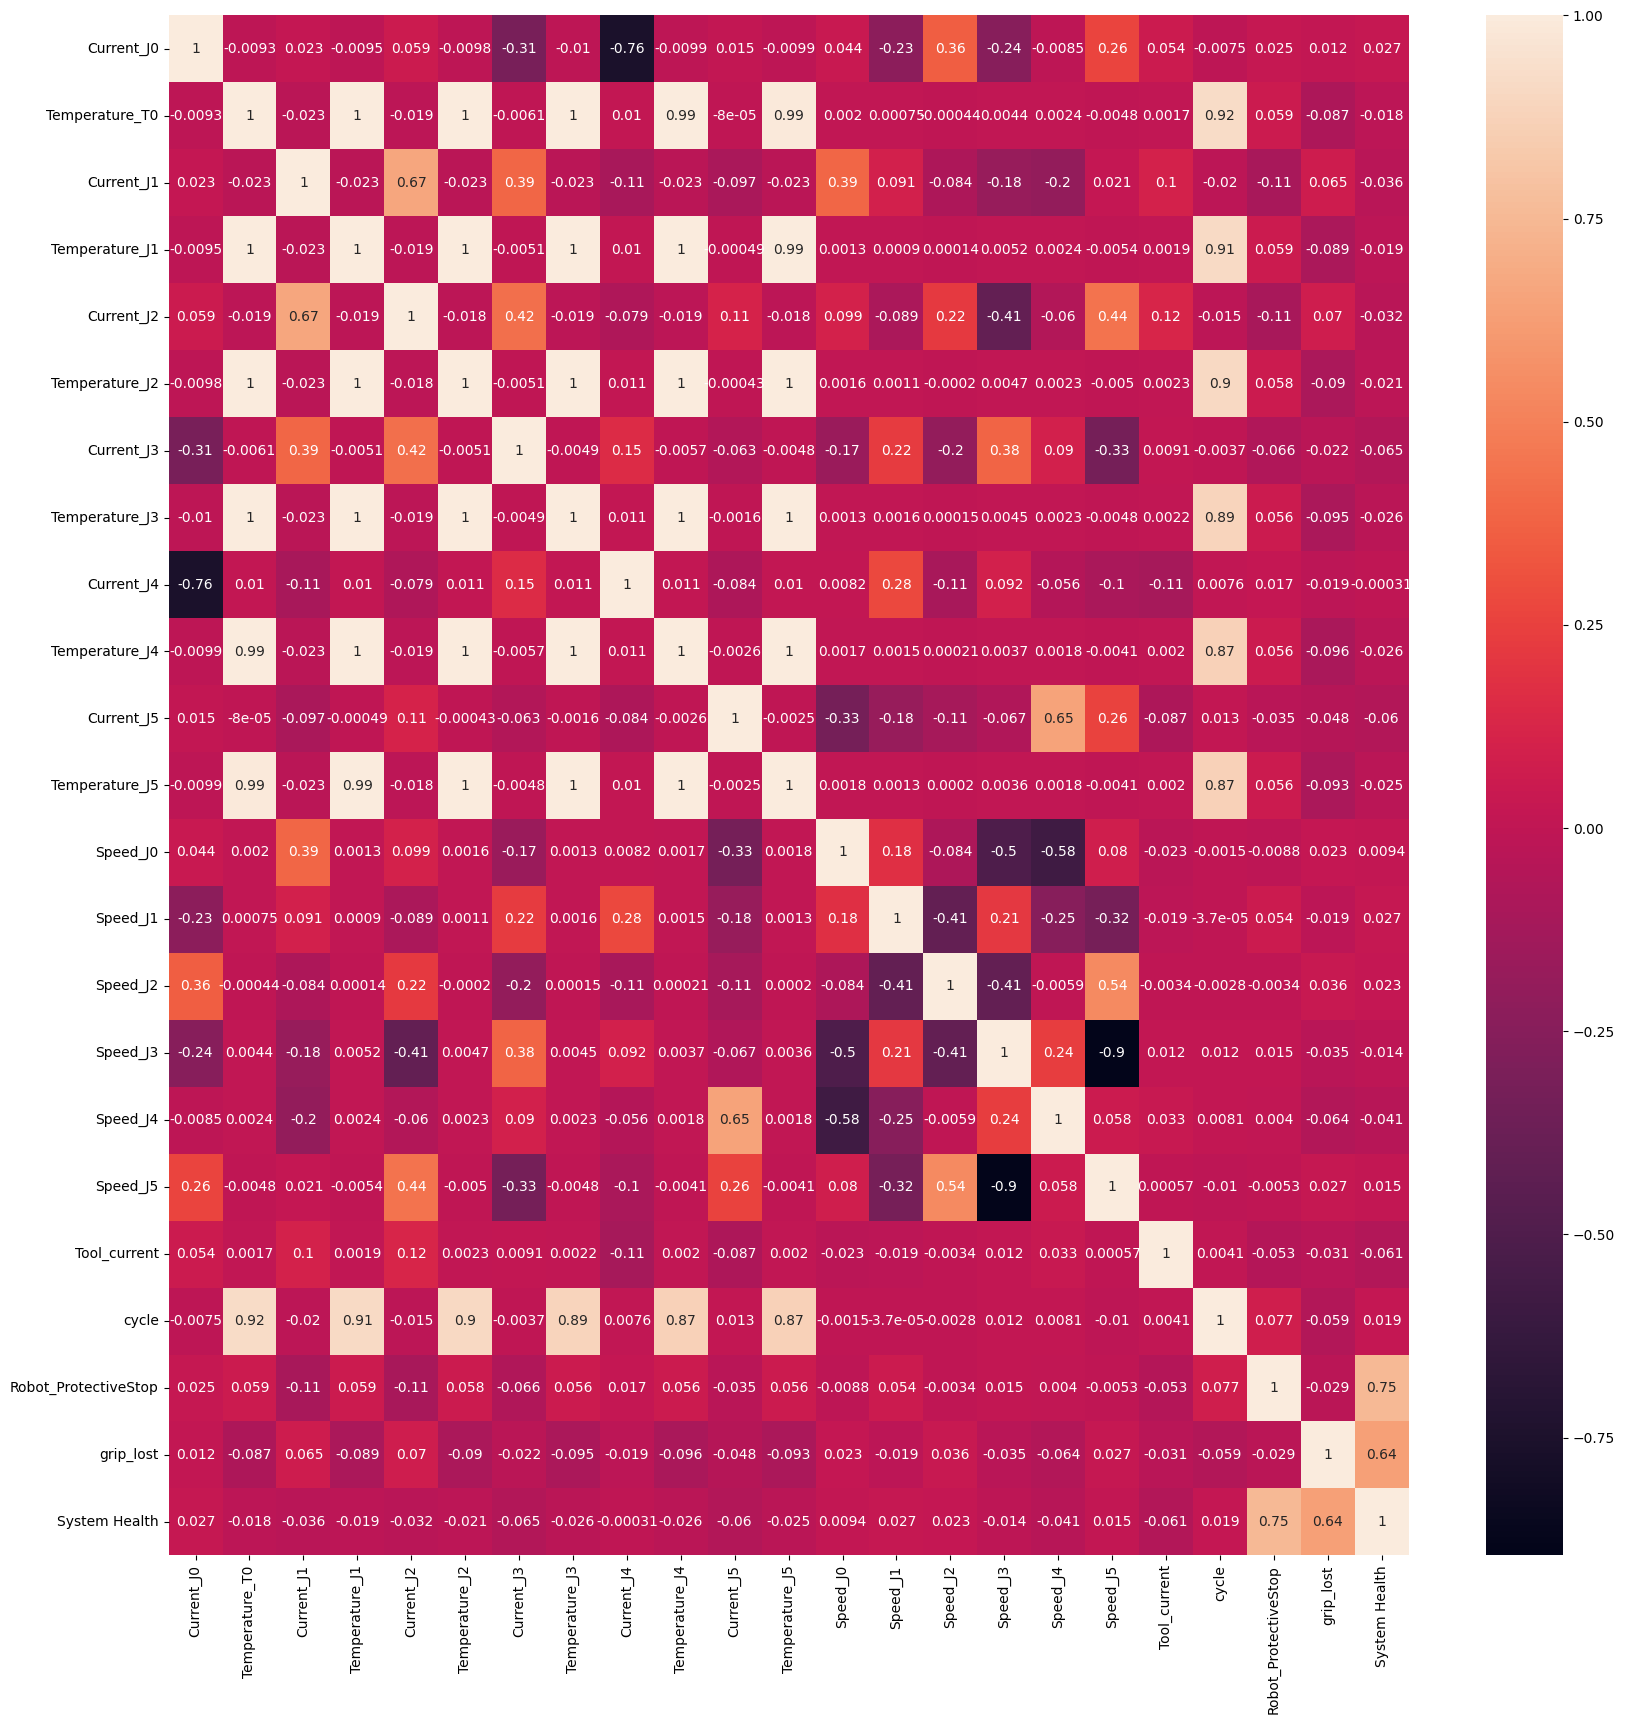

In [101]:
plt.figure(figsize=(20,20))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True)

# Step 5: Missing value treatment

Do not perform missing values or outliers treatment on the target variable

Choosing the method for treating missing values
 1. Delete rows with missing values: This method is simple and effective, but it may lose valuable data.
 2. Delete columns with missing values: This method can be useful if the number of missing values is significant and there is no alternative data to fill them.
 3. Fill missing values with a specific value: This method is simple and effective, but it may introduce bias if the specific value is not representative of the data.
 4. Fill missing values with the mean, median, or mode of the column: This method is effective when the data is normally distributed and the missing values are not extreme. It can also be used when the data is skewed.
 5. Use a regression model to predict the missing values: This method can be useful when the data is missing at random and there is a relationship between the missing values and other variables.
 6. Use a machine learning algorithm to predict the missing values: This method can be useful when the data is missing at random and there is a relationship between the missing values and other variables. Machine learning algorithms can learn from the non-missing data and make predictions for the missing values.


In [102]:
df.isnull().sum()

Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop     0
grip_lost                0
System Health            0
dtype: int64

In [103]:
# Example: categorical -> mode
# numerical -> mean
# print(df.select_dtypes(include=["number", "bool"]).columns)
# print(str(df['Robot_ProtectiveStop'].dtypes))
# print(type(df['Robot_ProtectiveStop'].mode()))
#print(df['Temperature_T0'].median())

df_copy_1 = df.copy()
for i in list(df.select_dtypes(include=["number", "bool"]).columns):
    data_type = str(df[i].dtypes)
    # Fill median values with numeric data
    if data_type != 'bool':
        #print(f"Median of {i} is {df_copy_1[i].median()}")
        df_copy_1[i] = df_copy_1[i].fillna(df_copy_1[i].median())
    # Fill mode values with categorical data
    elif data_type == 'bool':
        # print(f"The mode of this missing is {df_copy_1[i].mode()}")
        df_copy_1[i] = df_copy_1[i].fillna(df_copy_1[i].mode())
# Save to a file
df_copy_1.to_excel('Clean_UR3_filled_default.xlsx', index=False)

In [104]:
# Use KNNImputer -> fill missing values with KNN algorithms
from sklearn.impute import KNNImputer
df_copy_2 = df.copy()
impute = KNNImputer()

for i in df.select_dtypes(include=["number", "bool"]).columns:
    data_type = str(df[i].dtypes)
    # Fill KNN predictive values with missing numeric data
    if data_type != 'bool':
        df_copy_2[i] = impute.fit_transform(df_copy_2[[i]])
    # Fill mode values with missing categorical data
    elif data_type == 'bool':
        # print(f"The mode of this missing is {df_copy_1[i].mode()}")
        df_copy_1[i] = df_copy_1[i].fillna(df_copy_1[i].mode())
    
# Save to a file
df_copy_2.to_excel('Clean_UR3_knn.xlsx', index=False)

In [105]:
# Drop the rows with missing values and save to a file
df_copy_3 = df.copy()
df_copy_3 = df_copy_3.dropna()
# Save to a file
df_copy_3.to_excel('Clean_UR3_drop.xlsx', index=False)

In [106]:
# Check for null values again
df.isnull().sum()

Timestamp                0
Current_J0              46
Temperature_T0          54
Current_J1              54
Temperature_J1          54
Current_J2              54
Temperature_J2          54
Current_J3              54
Temperature_J3          54
Current_J4              54
Temperature_J4          54
Current_J5              54
Temperature_J5          54
Speed_J0                54
Speed_J1                54
Speed_J2                54
Speed_J3                54
Speed_J4                54
Speed_J5                54
Tool_current            54
cycle                    0
Robot_ProtectiveStop     0
grip_lost                0
System Health            0
dtype: int64

# Step 6: Treating outliers

In [107]:
# Example: 
# Replace rightmost values with maximum data values
# Replace leftmost values with minimum data values
# Only for continuous data, not for discrete data

In [108]:
def whisker(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr # lower bound
    uw = q3 + 1.5 * iqr # upper bound
    return lw, uw

In [109]:
whisker(df['GDP'])

KeyError: 'GDP'

In [ ]:
df.columns

Index(['Timestamp', 'Current_J0', 'Temperature_T0', 'Current_J1',
       'Temperature_J1', 'Current_J2', 'Temperature_J2', 'Current_J3',
       'Temperature_J3', 'Current_J4', 'Temperature_J4', 'Current_J5',
       'Temperature_J5', 'Speed_J0', 'Speed_J1', 'Speed_J2', 'Speed_J3',
       'Speed_J4', 'Speed_J5', 'Tool_current', 'cycle', 'Robot_ProtectiveStop',
       'grip_lost'],
      dtype='object')

In [ ]:
# Replacing outliers with minimum and maximum data values
for i in ['GDP', 'Total expenditure', 'thinness  1-19 years',  'thinness 5-9 years']:
    lw, uw = whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

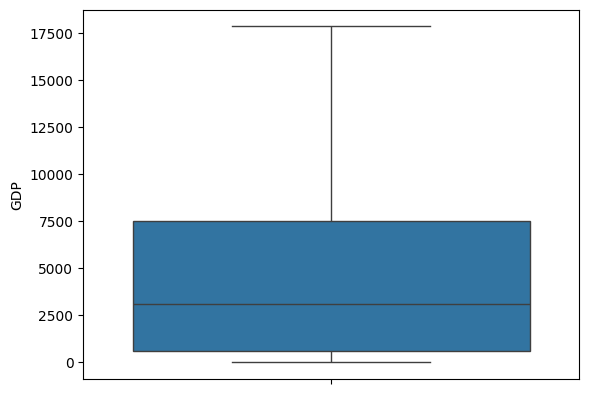

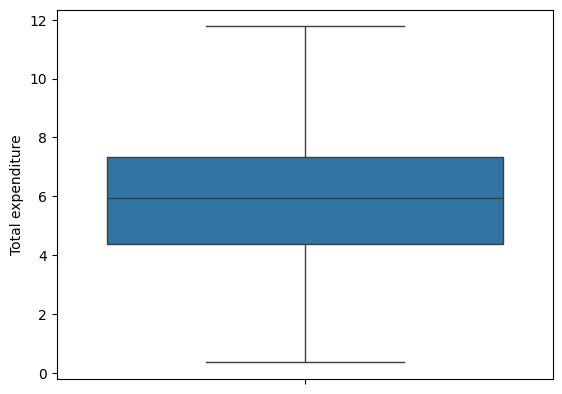

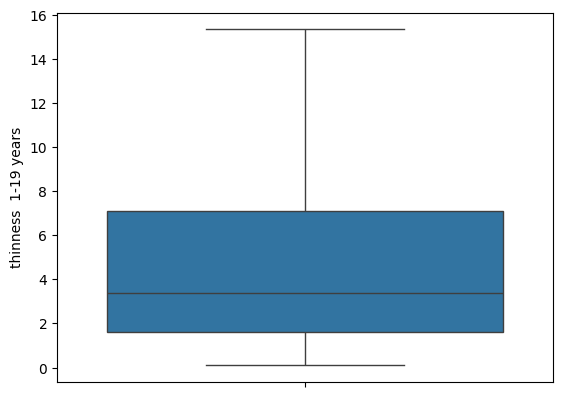

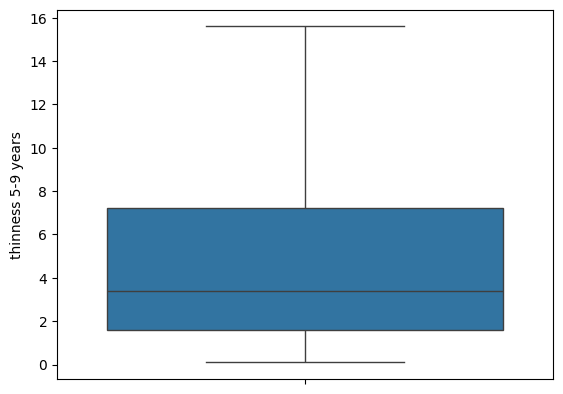

In [ ]:
for i in ['GDP', 'Total expenditure', 'thinness  1-19 years',  'thinness 5-9 years']:
    sns.boxplot(df[i])
    plt.show()

# Step 7: Duplicates and garbage value treatments

In [ ]:
# Check for duplicates
df.duplicated().sum()

0

In [ ]:
# Drop any duplicates values if detected
df.drop_duplicates()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,15.35,15.6,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,15.35,15.6,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,15.35,15.6,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,15.35,15.6,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,15.35,15.6,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004.0,Developing,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.40,9.4,0.407,9.2
2934,Zimbabwe,2003.0,Developing,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.80,9.9,0.418,9.5
2935,Zimbabwe,2002.0,Developing,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.20,1.3,0.427,10.0
2936,Zimbabwe,2001.0,Developing,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.60,1.7,0.427,9.8


# Step 8: Encoding the data


Do label encoding and one hot encoding with pd.getdummies

OHE in machine learning transforms categorical data into a numerical format that machine learning algorithms can process without imposing any ordinal relationships.

In [ ]:
dummy = pd.get_dummies(data=df, columns=["Country", "Status"], drop_first=True)

In [ ]:
dummy

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Country_United States of America,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developing
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,...,False,False,False,False,False,False,False,False,False,True
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,...,False,False,False,False,False,False,False,False,False,True
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,...,False,False,False,False,False,False,False,False,False,True
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,...,False,False,False,False,False,False,False,False,False,True
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004.0,44.3,723.0,27.0,4.36,0.000000,68.0,31.0,27.1,42.0,...,False,False,False,False,False,False,False,False,True,True
2934,2003.0,44.5,715.0,26.0,4.06,0.000000,7.0,998.0,26.7,41.0,...,False,False,False,False,False,False,False,False,True,True
2935,2002.0,44.8,73.0,25.0,4.43,0.000000,73.0,304.0,26.3,40.0,...,False,False,False,False,False,False,False,False,True,True
2936,2001.0,45.3,686.0,25.0,1.72,0.000000,76.0,529.0,25.9,39.0,...,False,False,False,False,False,False,False,False,True,True
